In [132]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import adjustText
from adjustText import adjust_text

#Upload from CSVs
build_disc_path = "Building Discipline Incidents.csv"
disct_disc_path = "District Discipline Incidents.csv"
build_attend_path = "Building Proportional Attendance Rates.csv"
disct_attend_path = "District Proportional Attendance Rates.csv"
overall_percent_path = "overall_weighted_average.csv"
fr_rates_path = "FRLUNCH.csv"

#Read data and results
build_disc_df = pd.read_csv(build_disc_path)
disct_disc_df = pd.read_csv(disct_disc_path)
build_attend_df = pd.read_csv(build_attend_path)
disct_attend_df = pd.read_csv(disct_attend_path)
overall_percent_df = pd.read_csv(overall_percent_path)
fr_rates_df = pd.read_csv(fr_rates_path)


# BUILDING DISCIPLINE

In [117]:
#Filter by years Building Discipline
build_disc_filtered_df = build_disc_df.loc[(build_disc_df["YEAR"]==2023)]

#Filter by Schools
build_disc_school_df = build_disc_filtered_df.loc[(build_disc_filtered_df["SCHOOL_NAME"]=="FESTUS MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="BARNWELL MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="HOLLENBECK MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="FRANCIS HOWELL MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="SAEGER MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="BRYAN MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="ROCKWOOD VALLEY MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="CRESTVIEW MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="LASALLE SPRINGS MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="WILDWOOD MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="ROCKWOOD SOUTH MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="SELVIDGE MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="BLACK HAWK MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="Orchard Farm Middle School")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="HARDIN MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="BERNARD C. CAMPBELL MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="SUMMIT LAKES MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="PLEASANT LEA MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="WENTZVILLE MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="WENTZVILLE SOUTH MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="FRONTIER MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="FT. ZUMWALT NORTH MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="DR. BERNARD J. DUBRAY MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="FT. ZUMWALT SOUTH MIDDLE")\
                                                 | (build_disc_filtered_df["SCHOOL_NAME"]=="FT. ZUWMALT WEST MIDDLE")]

#Reduce sorted data frame to columns needed
build_disc_school_reduced_df = build_disc_school_df[["YEAR", "COUNTY_DISTRICT_CODE", "DISTRICT_NAME", "SCHOOL_CODE","SCHOOL_NAME", "ENROLLMENT_GRADES_K_12", "DISCIPLINE_INCIDENTS", "DISCIPLINE_INCIDENT_RATE"]]

build_disc_school_reduced_df.head()

,YEAR,COUNTY_DISTRICT_CODE,DISTRICT_NAME,SCHOOL_CODE,SCHOOL_NAME,ENROLLMENT_GRADES_K_12,DISCIPLINE_INCIDENTS,DISCIPLINE_INCIDENT_RATE
19535,2023,48071,LEE'S SUMMIT R-VII,3000,BERNARD C. CAMPBELL MIDDLE,1067,18,1.7
19556,2023,48071,LEE'S SUMMIT R-VII,3050,SUMMIT LAKES MIDDLE,1012,5,0.5
19576,2023,48071,LEE'S SUMMIT R-VII,3080,PLEASANT LEA MIDDLE,938,16,1.7
25367,2023,50006,FESTUS R-VI,3020,FESTUS MIDDLE,552,12,2.2
38036,2023,92087,FT. ZUMWALT R-II,3000,FT. ZUMWALT NORTH MIDDLE,1067,12,1.1


# DISTRICT DISCIPLINE

In [118]:
#List columns
disct_disc_df.columns

Index(['YEAR', 'COUNTY_DISTRICT_CODE', 'DISTRICT_NAME',
       'ENROLLMENT_GRADES_K_12', 'DISCIPLINE_INCIDENTS',
       'DISCIPLINE_INCIDENT_RATE', 'DISCIPLINE_ALCOHOL',
       'DISCIPLINE_ALCOHOL_RATE', 'DISCIPLINE_DRUG', 'DISCIPLINE_DRUG_RATE',
       'DISCIPLINE_OTHER', 'DISCIPLINE_OTHER_RATE', 'DISCIPLINE_TOBACCO',
       'DISCIPLINE_TOBACCO_RATE', 'DISCIPLINE_VIOLENCE',
       'DISCIPLINE_VIOLENCE_RATE', 'DISCIPLINE_WEAPON',
       'DISCIPLINE_WEAPON_RATE', 'DISCIPLINE_REMOVAL_IN_SCHL_SUSP',
       'DISCIPLINE_REMOVAL_IN_SCHL_SUSP_RATE',
       'DISCIPLINE_REMOVAL_OUT_SCHL_SUSP',
       'DISCIPLINE_REMOVAL_OUT_SCHL_SUSP_RATE', 'DISCIPLINE_REMOVAL_EXPULSION',
       'DISCIPLINE_EXPULSION_RATE', 'DISCIPLINE_MORE_10_DAYS',
       'DISCIPLINE_MORE_10_DAYS_RATE'],
      dtype='object')

In [119]:
#Filter by years District Discipline
disct_disc_filtered_df = disct_disc_df.loc[(disct_disc_df["YEAR"]==2023)]

#Filter by District
disct_disc_school_df = disct_disc_filtered_df.loc[(disct_disc_filtered_df["DISTRICT_NAME"]=="LEE'S SUMMIT R-VII")\
                                                 | (disct_disc_filtered_df["DISTRICT_NAME"]=="FRANCIS HOWELL R-III")\
                                                 | (disct_disc_filtered_df["DISTRICT_NAME"]=="ROCKWOOD R-VI")\
                                                 | (disct_disc_filtered_df["DISTRICT_NAME"]=="WARREN CO. R-III")\
                                                 | (disct_disc_filtered_df["DISTRICT_NAME"]=="ORCHARD FARM R-V")\
                                                 | (disct_disc_filtered_df["DISTRICT_NAME"]=="ST. CHARLES R-VI")\
                                                 | (disct_disc_filtered_df["DISTRICT_NAME"]=="WENTZVILLE R-IV")\
                                                 | (disct_disc_filtered_df["DISTRICT_NAME"]=="FESTUS R-VI")\
                                                 | (disct_disc_filtered_df["DISTRICT_NAME"]=="FT. ZUMWALT R-II")]

disct_disc_school_df.head()

#Reduce sorted data frame to columns needed
disct_disc_school_reduced_df = disct_disc_school_df[['YEAR', 'COUNTY_DISTRICT_CODE', 'DISTRICT_NAME',
       'ENROLLMENT_GRADES_K_12', 'DISCIPLINE_INCIDENTS',
       'DISCIPLINE_INCIDENT_RATE']]

disct_disc_school_reduced_df

,YEAR,COUNTY_DISTRICT_CODE,DISTRICT_NAME,ENROLLMENT_GRADES_K_12,DISCIPLINE_INCIDENTS,DISCIPLINE_INCIDENT_RATE
5088,2023,48071,LEE'S SUMMIT R-VII,17470,245,1.4
5867,2023,50006,FESTUS R-VI,3318,27,0.8
9788,2023,92087,FT. ZUMWALT R-II,16796,276,1.6
9811,2023,92088,FRANCIS HOWELL R-III,16511,188,1.1
9834,2023,92089,WENTZVILLE R-IV,17611,123,0.7
9857,2023,92090,ST. CHARLES R-VI,4589,118,2.6
9880,2023,92091,ORCHARD FARM R-V,2166,28,1.3
10202,2023,96091,ROCKWOOD R-VI,19903,191,1
11969,2023,109003,WARREN CO. R-III,3034,46,1.5


# BUILDING ATTENDANCE

In [120]:
build_attend_df.columns

Index(['YEAR', 'COUNTY_DISTRICT_CODE', 'DISTRICT_NAME', 'SCHOOL_CODE',
       'SCHOOL_NAME', 'PROPORTIONAL_ATTENDANCE_TOTAL_90ABV',
       'PROPORTIONAL_ATTENDANCE_TOTAL', 'PROPORTIONAL_ATTENDANCE_TOTAL_PCT',
       'PROPORTIONAL_ATTENDANCE_ASIAN_90ABV', 'PROPORTIONAL_ATTENDANCE_ASIAN',
       'PROPORTIONAL_ATTENDANCE_ASIAN_PCT',
       'PROPORTIONAL_ATTENDANCE_BLACK_90ABV', 'PROPORTIONAL_ATTENDANCE_BLACK',
       'PROPORTIONAL_ATTENDANCE_BLACK_PCT',
       'PROPORTIONAL_ATTENDANCE_HISPANIC_90ABV',
       'PROPORTIONAL_ATTENDANCE_HISPANIC',
       'PROPORTIONAL_ATTENDANCE_HISPANIC_PCT',
       'PROPORTIONAL_ATTENDANCE_INDIAN_90ABV',
       'PROPORTIONAL_ATTENDANCE_INDIAN', 'PROPORTIONAL_ATTENDANCE_INDIAN_PCT',
       'PROPORTIONAL_ATTENDANCE_MULTIRACE_90ABV',
       'PROPORTIONAL_ATTENDANCE_MULTIRACE',
       'PROPORTIONAL_ATTENDANCE_MULTIRACE_PCT',
       'PROPORTIONAL_ATTENDANCE_PACIFIC_ISLANDER_90ABV',
       'PROPORTIONAL_ATTENDANCE_PACIFIC_ISLANDER',
       'PROPORTIONAL_ATTENDANC

In [121]:
##Filter by years District Discipline
build_attend_filtered_df = build_attend_df.loc[(build_attend_df["YEAR"]==2023)]

#Filter by Schools
build_attend_school_df = build_attend_filtered_df.loc[(build_attend_filtered_df["SCHOOL_NAME"]=="FESTUS MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="BARNWELL MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="HOLLENBECK MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="FRANCIS HOWELL MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="SAEGER MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="BRYAN MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="ROCKWOOD VALLEY MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="CRESTVIEW MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="LASALLE SPRINGS MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="WILDWOOD MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="ROCKWOOD SOUTH MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="SELVIDGE MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="BLACK HAWK MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="Orchard Farm Middle School")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="HARDIN MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="BERNARD C. CAMPBELL MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="SUMMIT LAKES MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="PLEASANT LEA MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="WENTZVILLE MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="WENTZVILLE SOUTH MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="FRONTIER MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="FT. ZUMWALT NORTH MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="DR. BERNARD J. DUBRAY MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="FT. ZUMWALT SOUTH MIDDLE")\
                                                 | (build_attend_filtered_df["SCHOOL_NAME"]=="FT. ZUWMALT WEST MIDDLE")]

#Reduce sorted data frame to columns needed
build_attend_school_reduced_df = build_attend_school_df[['YEAR', 'COUNTY_DISTRICT_CODE', 'DISTRICT_NAME', 'SCHOOL_CODE',
       'SCHOOL_NAME', 'PROPORTIONAL_ATTENDANCE_TOTAL_PCT']]

build_attend_school_reduced_df.head()

,YEAR,COUNTY_DISTRICT_CODE,DISTRICT_NAME,SCHOOL_CODE,SCHOOL_NAME,PROPORTIONAL_ATTENDANCE_TOTAL_PCT
12894,2023,48071,LEE'S SUMMIT R-VII,3000,BERNARD C. CAMPBELL MIDDLE,80.6
12910,2023,48071,LEE'S SUMMIT R-VII,3050,SUMMIT LAKES MIDDLE,88.7
12925,2023,48071,LEE'S SUMMIT R-VII,3080,PLEASANT LEA MIDDLE,84.9
16673,2023,50006,FESTUS R-VI,3020,FESTUS MIDDLE,81.6
24972,2023,92087,FT. ZUMWALT R-II,3000,FT. ZUMWALT NORTH MIDDLE,79.4


# District Attendance

In [122]:
#List columns
disct_attend_df.columns

Index(['YEAR', 'COUNTY_DISTRICT_CODE', 'DISTRICT_NAME',
       'PROPORTIONAL_ATTENDANCE_TOTAL_90ABV', 'PROPORTIONAL_ATTENDANCE_TOTAL',
       'PROPORTIONAL_ATTENDANCE_TOTAL_PCT',
       'PROPORTIONAL_ATTENDANCE_ASIAN_90ABV', 'PROPORTIONAL_ATTENDANCE_ASIAN',
       'PROPORTIONAL_ATTENDANCE_ASIAN_PCT',
       'PROPORTIONAL_ATTENDANCE_BLACK_90ABV', 'PROPORTIONAL_ATTENDANCE_BLACK',
       'PROPORTIONAL_ATTENDANCE_BLACK_PCT',
       'PROPORTIONAL_ATTENDANCE_HISPANIC_90ABV',
       'PROPORTIONAL_ATTENDANCE_HISPANIC',
       'PROPORTIONAL_ATTENDANCE_HISPANIC_PCT',
       'PROPORTIONAL_ATTENDANCE_INDIAN_90ABV',
       'PROPORTIONAL_ATTENDANCE_INDIAN', 'PROPORTIONAL_ATTENDANCE_INDIAN_PCT',
       'PROPORTIONAL_ATTENDANCE_MULTIRACE_90ABV',
       'PROPORTIONAL_ATTENDANCE_MULTIRACE',
       'PROPORTIONAL_ATTENDANCE_MULTIRACE_PCT',
       'PROPORTIONAL_ATTENDANCE_PACIFIC_ISLANDER_90ABV',
       'PROPORTIONAL_ATTENDANCE_PACIFIC_ISLANDER',
       'PROPORTIONAL_ATTENDANCE_PACIFIC_ISLANDER_PCT',
     

In [123]:
#Filter by years District Discipline
disct_attend_filtered_df = disct_attend_df.loc[(disct_attend_df["YEAR"]==2023)]

#Filter by District
disct_attend_school_df = disct_attend_filtered_df.loc[(disct_attend_filtered_df["DISTRICT_NAME"]=="LEE'S SUMMIT R-VII")\
                                                 | (disct_attend_filtered_df["DISTRICT_NAME"]=="FRANCIS HOWELL R-III")\
                                                 | (disct_attend_filtered_df["DISTRICT_NAME"]=="ROCKWOOD R-VI")\
                                                 | (disct_attend_filtered_df["DISTRICT_NAME"]=="WARREN CO. R-III")\
                                                 | (disct_attend_filtered_df["DISTRICT_NAME"]=="ORCHARD FARM R-V")\
                                                 | (disct_attend_filtered_df["DISTRICT_NAME"]=="ST. CHARLES R-VI")\
                                                 | (disct_attend_filtered_df["DISTRICT_NAME"]=="WENTZVILLE R-IV")\
                                                 | (disct_attend_filtered_df["DISTRICT_NAME"]=="FESTUS R-VI")\
                                                 | (disct_attend_filtered_df["DISTRICT_NAME"]=="FT. ZUMWALT R-II")]

#Reduce sorted data frame to columns needed
disct_attend_school_reduced_df = disct_attend_school_df[['YEAR', 'COUNTY_DISTRICT_CODE', 'DISTRICT_NAME',
                                                         'PROPORTIONAL_ATTENDANCE_TOTAL_PCT']]

disct_attend_school_reduced_df

,YEAR,COUNTY_DISTRICT_CODE,DISTRICT_NAME,PROPORTIONAL_ATTENDANCE_TOTAL_PCT
3310,2023,48071,LEE'S SUMMIT R-VII,85.2
3902,2023,50006,FESTUS R-VI,83.2
6456,2023,92087,FT. ZUMWALT R-II,80.9
6471,2023,92088,FRANCIS HOWELL R-III,81.9
6486,2023,92089,WENTZVILLE R-IV,78.2
6501,2023,92090,ST. CHARLES R-VI,80.3
6516,2023,92091,ORCHARD FARM R-V,82.1
6726,2023,96091,ROCKWOOD R-VI,81.9
7876,2023,109003,WARREN CO. R-III,75.4


## Merge Tables

In [124]:
merged_disct_df = pd.merge(disct_disc_school_reduced_df, disct_attend_school_reduced_df, how = "inner", on=["YEAR", 'DISTRICT_NAME', "COUNTY_DISTRICT_CODE"])
merged_disct_reduced_df = merged_disct_df[["DISTRICT_NAME", "PROPORTIONAL_ATTENDANCE_TOTAL_PCT"]]
merged_disct_reduced_df.head()

,DISTRICT_NAME,PROPORTIONAL_ATTENDANCE_TOTAL_PCT
0,LEE'S SUMMIT R-VII,85.2
1,FESTUS R-VI,83.2
2,FT. ZUMWALT R-II,80.9
3,FRANCIS HOWELL R-III,81.9
4,WENTZVILLE R-IV,78.2


In [125]:
merged_building_df = pd.merge(build_disc_school_reduced_df, build_attend_school_reduced_df, how = "inner", on = ["YEAR", "COUNTY_DISTRICT_CODE",
                                                                                                                "DISTRICT_NAME", "SCHOOL_CODE", "SCHOOL_NAME"])
merged_building_df.head()

,YEAR,COUNTY_DISTRICT_CODE,DISTRICT_NAME,SCHOOL_CODE,SCHOOL_NAME,ENROLLMENT_GRADES_K_12,DISCIPLINE_INCIDENTS,DISCIPLINE_INCIDENT_RATE,PROPORTIONAL_ATTENDANCE_TOTAL_PCT
0,2023,48071,LEE'S SUMMIT R-VII,3000,BERNARD C. CAMPBELL MIDDLE,1067,18,1.7,80.6
1,2023,48071,LEE'S SUMMIT R-VII,3050,SUMMIT LAKES MIDDLE,1012,5,0.5,88.7
2,2023,48071,LEE'S SUMMIT R-VII,3080,PLEASANT LEA MIDDLE,938,16,1.7,84.9
3,2023,50006,FESTUS R-VI,3020,FESTUS MIDDLE,552,12,2.2,81.6
4,2023,92087,FT. ZUMWALT R-II,3000,FT. ZUMWALT NORTH MIDDLE,1067,12,1.1,79.4


## Scores Data math 7

In [134]:
overall_percent_df.head()

,DISTRICT_NAME,MAP MATH AVERAGE 7,MAP MATH AVERAGE 8,MAP ELA 7 AVERAGE,MAP MATH 8 AVERAGE,MAP ELA 8 AVERAGE,MAP MATH 6 AVERAGE,MAP ELA 6 AVERAGE
0,FRANCIS HOWELL R-III,53.1,48.5,67.6,48.5,66.3,57.8,63.2
1,ROCKWOOD R-VI,51.3,40.0,67.3,40.0,64.9,55.8,64.5
2,WARREN CO. R-III,44.7,32.0,58.3,32.0,55.2,39.8,52.2
3,ORCHARD FARM R-V,49.0,42.1,61.1,42.1,59.6,55.9,58.6
4,ST. CHARLES R-VI,46.3,41.9,59.8,41.9,61.0,47.6,57.0


In [135]:
#Merge overall percent with district data
merged_disct_scores = pd.merge(merged_disct_df, overall_percent_df, on="DISTRICT_NAME", how = "outer")

merged_disct_scores

,YEAR,COUNTY_DISTRICT_CODE,DISTRICT_NAME,ENROLLMENT_GRADES_K_12,DISCIPLINE_INCIDENTS,DISCIPLINE_INCIDENT_RATE,PROPORTIONAL_ATTENDANCE_TOTAL_PCT,MAP MATH AVERAGE 7,MAP MATH AVERAGE 8,MAP ELA 7 AVERAGE,MAP MATH 8 AVERAGE,MAP ELA 8 AVERAGE,MAP MATH 6 AVERAGE,MAP ELA 6 AVERAGE
0,2023,48071,LEE'S SUMMIT R-VII,17470,245,1.4,85.2,52.4,45.3,63.5,45.3,60.0,49.9,59.2
1,2023,50006,FESTUS R-VI,3318,27,0.8,83.2,58.4,38.2,65.7,38.2,64.2,56.4,63.7
2,2023,92087,FT. ZUMWALT R-II,16796,276,1.6,80.9,52.8,47.1,65.7,47.1,63.3,55.1,61.6
3,2023,92088,FRANCIS HOWELL R-III,16511,188,1.1,81.9,53.1,48.5,67.6,48.5,66.3,57.8,63.2
4,2023,92089,WENTZVILLE R-IV,17611,123,0.7,78.2,47.9,45.1,63.0,45.1,60.8,50.8,59.0
5,2023,92090,ST. CHARLES R-VI,4589,118,2.6,80.3,46.3,41.9,59.8,41.9,61.0,47.6,57.0
6,2023,92091,ORCHARD FARM R-V,2166,28,1.3,82.1,49.0,42.1,61.1,42.1,59.6,55.9,58.6
7,2023,96091,ROCKWOOD R-VI,19903,191,1,81.9,51.3,40.0,67.3,40.0,64.9,55.8,64.5
8,2023,109003,WARREN CO. R-III,3034,46,1.5,75.4,44.7,32.0,58.3,32.0,55.2,39.8,52.2


In [136]:
merged_disct_scores["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"] = merged_disct_scores["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"].astype(float)

In [137]:
merged_disct_scores_df = merged_disct_scores.sort_values(by=["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"])
merged_disct_df_2 = merged_disct_scores_df[["DISTRICT_NAME", "PROPORTIONAL_ATTENDANCE_TOTAL_PCT", "MAP MATH AVERAGE 7", "MAP ELA 7 AVERAGE",
                                           "MAP MATH AVERAGE 8", "MAP ELA 8 AVERAGE", "MAP MATH 6 AVERAGE", "MAP ELA 6 AVERAGE"]]
merged_disct_new_df = merged_disct_df_2.reset_index()
merged_disct_new_df.head()


,index,DISTRICT_NAME,PROPORTIONAL_ATTENDANCE_TOTAL_PCT,MAP MATH AVERAGE 7,MAP ELA 7 AVERAGE,MAP MATH AVERAGE 8,MAP ELA 8 AVERAGE,MAP MATH 6 AVERAGE,MAP ELA 6 AVERAGE
0,8,WARREN CO. R-III,75.4,44.7,58.3,32.0,55.2,39.8,52.2
1,4,WENTZVILLE R-IV,78.2,47.9,63.0,45.1,60.8,50.8,59.0
2,5,ST. CHARLES R-VI,80.3,46.3,59.8,41.9,61.0,47.6,57.0
3,2,FT. ZUMWALT R-II,80.9,52.8,65.7,47.1,63.3,55.1,61.6
4,3,FRANCIS HOWELL R-III,81.9,53.1,67.6,48.5,66.3,57.8,63.2


0.7287963497496357


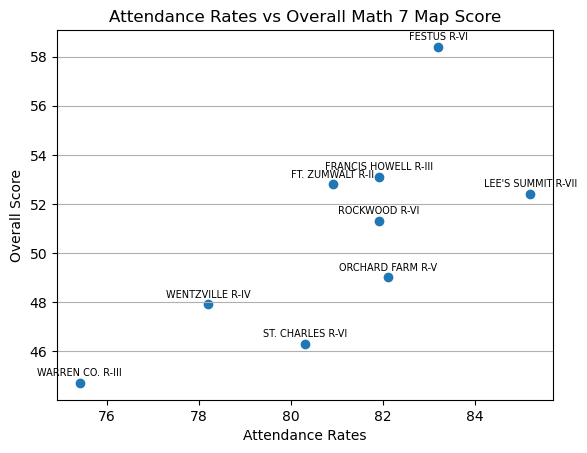

In [89]:
x = merged_disct_new_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"]
y=merged_disct_new_df["MAP MATH AVERAGE 7"]
n=merged_disct_new_df["DISTRICT_NAME"]

fig, ax = plt.subplots()
plt.scatter(x,y)
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x_values,regress_values,"r-")
plt.xlabel("Attendance Rates")
plt.ylabel("Overall Score")
plt.title("Attendance Rates vs Overall Math 7 Map Score")
plt.grid(axis="y")
#texts = []
#for i, txt in enumerate( n ):
    #texts.append(ax.text(x[i], y[i], txt))
#adjust_text(texts)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]+0.2), size = 7, horizontalalignment="center", verticalalignment="bottom")
plt.savefig("AttMathGr7")
print(rvalue)
plt.show()

# F&R Lunch by districts Math 7

In [115]:
#Merge FR and Dists Data
merged_fr_df = pd.merge(merged_disct_new_df, fr_rates_df, on="DISTRICT_NAME", how = "outer")

merged_fr_reduced_df = merged_fr_df[["DISTRICT_NAME", "MAP MATH AVERAGE 7", "MAP ELA 7 AVERAGE","FR_PCT_FLOAT"]]


merged_fr_df.dtypes



index                                float64
DISTRICT_NAME                         object
PROPORTIONAL_ATTENDANCE_TOTAL_PCT    float64
MAP MATH AVERAGE 7                   float64
MAP ELA 7 AVERAGE                    float64
Total Number of Students F&R          object
Total Number Reported                 object
FR_PCT                               float64
FR_PCT_FLOAT                         float64
FR_ELA_PCT                           float64
FR_ELA_PCT_FLOAT                     float64
Unnamed: 7                           float64
Unnamed: 8                           float64
Unnamed: 9                           float64
Unnamed: 10                          float64
Unnamed: 11                          float64
Unnamed: 12                          float64
Unnamed: 13                          float64
Unnamed: 14                          float64
dtype: object

In [104]:
merged_fr_reduced_2_df = merged_fr_reduced_df.sort_values(by=["FR_PCT_FLOAT"])
merged_fr_reduced_2_df = merged_fr_reduced_2_df[["DISTRICT_NAME", "MAP MATH AVERAGE 7", "MAP ELA 7 AVERAGE","FR_PCT_FLOAT"]]
merged_fr_new_df = merged_fr_reduced_2_df.reset_index()
merged_fr_new_df.head()

,index,DISTRICT_NAME,MAP MATH AVERAGE 7,MAP ELA 7 AVERAGE,FR_PCT_FLOAT
0,5,ROCKWOOD R-VI,51.3,67.3,12.0
1,4,FRANCIS HOWELL R-III,53.1,67.6,14.0
2,1,WENTZVILLE R-IV,47.9,63.0,15.0
3,3,FT. ZUMWALT R-II,52.8,65.7,19.0
4,8,LEE'S SUMMIT R-VII,52.4,63.5,20.0


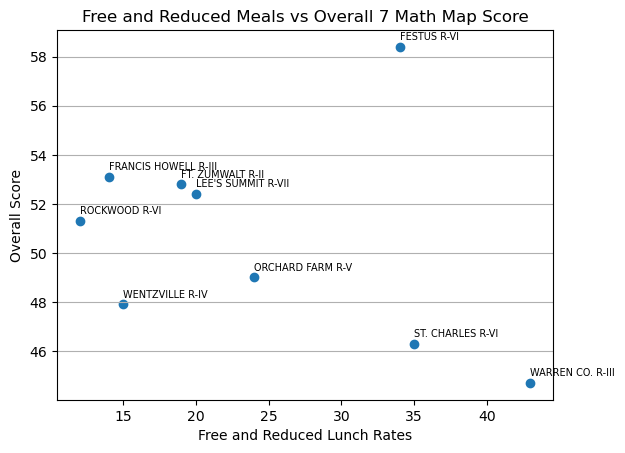

In [91]:
x = merged_fr_new_df["FR_PCT_FLOAT"]
y=merged_fr_new_df["MAP MATH AVERAGE 7"]
n=merged_fr_new_df["DISTRICT_NAME"]

fig, ax = plt.subplots()
plt.scatter(x,y)
plt.xlabel("Free and Reduced Lunch Rates")
plt.ylabel("Overall Score")
plt.title("Free and Reduced Meals vs Overall 7 Math Map Score")
plt.grid(axis="y")
#texts = []
#for i, txt in enumerate( n ):
    #texts.append(ax.text(x[i], y[i], txt))
#adjust_text(texts)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]+0.2), size = 7, horizontalalignment="left", verticalalignment="bottom")
plt.savefig("FrMathGr7")
plt.show()

# Scores ELA 7

0.7287963497496357


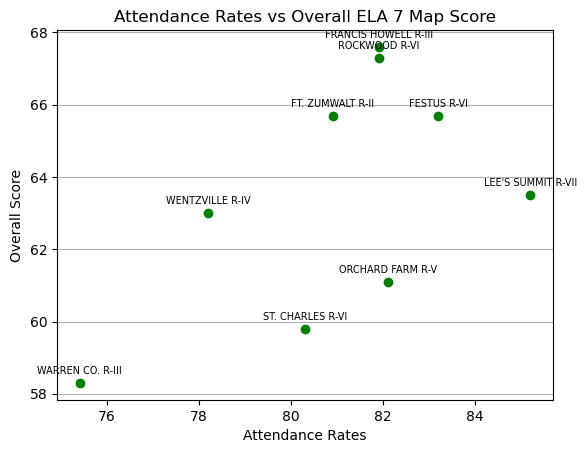

In [88]:
#Attendance Rates

x = merged_disct_new_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"]
y=merged_disct_new_df["MAP ELA 7 AVERAGE"]
n=merged_disct_new_df["DISTRICT_NAME"]

fig, ax = plt.subplots()
plt.scatter(x,y, color = 'g')
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x_values,regress_values,"r-")
plt.xlabel("Attendance Rates")
plt.ylabel("Overall Score")
plt.title("Attendance Rates vs Overall ELA 7 Map Score")
plt.grid(axis="y")
#texts = []
#for i, txt in enumerate( n ):
    #texts.append(ax.text(x[i], y[i], txt))
#adjust_text(texts)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]+0.2), size = 7, horizontalalignment="center", verticalalignment="bottom")
plt.savefig("AttELAGr7")
print(rvalue)
plt.show()

In [152]:
#FR Lunch
merged_fr_new_df.head()



,index,DISTRICT_NAME,MAP MATH AVERAGE 7,MAP ELA 7 AVERAGE,FR_PCT_FLOAT
0,5,ROCKWOOD R-VI,51.3,67.3,12.0
1,4,FRANCIS HOWELL R-III,53.1,67.6,14.0
2,1,WENTZVILLE R-IV,47.9,63.0,15.0
3,3,FT. ZUMWALT R-II,52.8,65.7,19.0
4,8,LEE'S SUMMIT R-VII,52.4,63.5,20.0


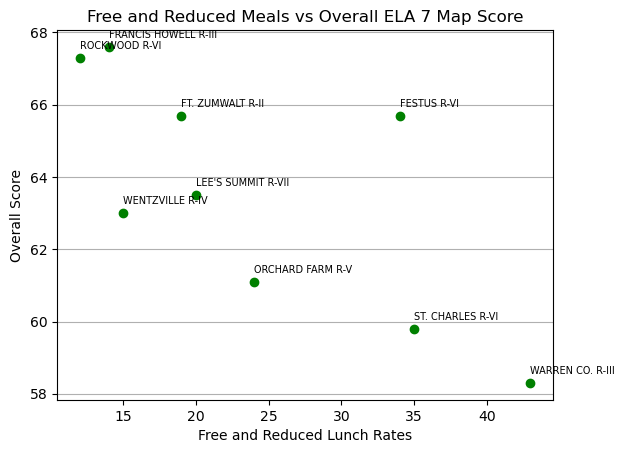

In [107]:
#FR Rates
x = merged_fr_new_df["FR_PCT_FLOAT"]
y=merged_fr_new_df["MAP ELA 7 AVERAGE"]
n=merged_fr_new_df["DISTRICT_NAME"]

fig, ax = plt.subplots()
plt.scatter(x,y, color = 'g')
plt.xlabel("Free and Reduced Lunch Rates")
plt.ylabel("Overall Score")
plt.title("Free and Reduced Meals vs Overall ELA 7 Map Score")
plt.grid(axis="y")
#texts = []
#for i, txt in enumerate( n ):
    #texts.append(ax.text(x[i], y[i], txt))
#adjust_text(texts)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]+0.2), size = 7, horizontalalignment="left", verticalalignment="bottom")
plt.savefig("FrELAGr7")
plt.show()

# SCORES 8TH

In [150]:
### Overall df with all scores and all rates

merged_all_data_df = pd.merge(merged_disct_new_df, merged_fr_new_df,on = ["DISTRICT_NAME", "MAP MATH AVERAGE 7", "MAP ELA 7 AVERAGE",
                                                                         ], how="inner")
merged_all_data_2_df = merged_all_data_df.drop(columns=["index_x", "index_y"])
merged_all_data_2_df

,DISTRICT_NAME,PROPORTIONAL_ATTENDANCE_TOTAL_PCT,MAP MATH AVERAGE 7,MAP ELA 7 AVERAGE,MAP MATH AVERAGE 8,MAP ELA 8 AVERAGE,MAP MATH 6 AVERAGE,MAP ELA 6 AVERAGE,FR_PCT_FLOAT
0,WARREN CO. R-III,75.4,44.7,58.3,32.0,55.2,39.8,52.2,43.0
1,WENTZVILLE R-IV,78.2,47.9,63.0,45.1,60.8,50.8,59.0,15.0
2,ST. CHARLES R-VI,80.3,46.3,59.8,41.9,61.0,47.6,57.0,35.0
3,FT. ZUMWALT R-II,80.9,52.8,65.7,47.1,63.3,55.1,61.6,19.0
4,FRANCIS HOWELL R-III,81.9,53.1,67.6,48.5,66.3,57.8,63.2,14.0
5,ROCKWOOD R-VI,81.9,51.3,67.3,40.0,64.9,55.8,64.5,12.0
6,ORCHARD FARM R-V,82.1,49.0,61.1,42.1,59.6,55.9,58.6,24.0
7,FESTUS R-VI,83.2,58.4,65.7,38.2,64.2,56.4,63.7,34.0
8,LEE'S SUMMIT R-VII,85.2,52.4,63.5,45.3,60.0,49.9,59.2,20.0


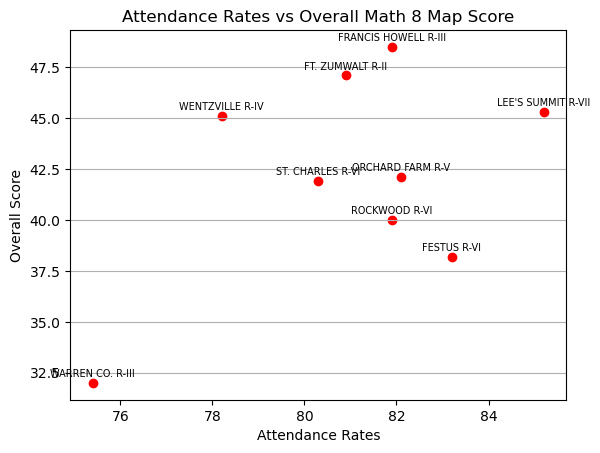

In [151]:
#Attendance Rates Math 8

x = merged_all_data_2_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"]
y=merged_all_data_2_df["MAP MATH AVERAGE 8"]
n=merged_all_data_df["DISTRICT_NAME"]

fig, ax = plt.subplots()
plt.scatter(x,y, color = 'r')
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x_values,regress_values,"r-")
plt.xlabel("Attendance Rates")
plt.ylabel("Overall Score")
plt.title("Attendance Rates vs Overall Math 8 Map Score")
plt.grid(axis="y")
#texts = []
#for i, txt in enumerate( n ):
    #texts.append(ax.text(x[i], y[i], txt))
#adjust_text(texts)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]+0.2), size = 7, horizontalalignment="center", verticalalignment="bottom")
plt.savefig("AttMathGr8")
plt.show()

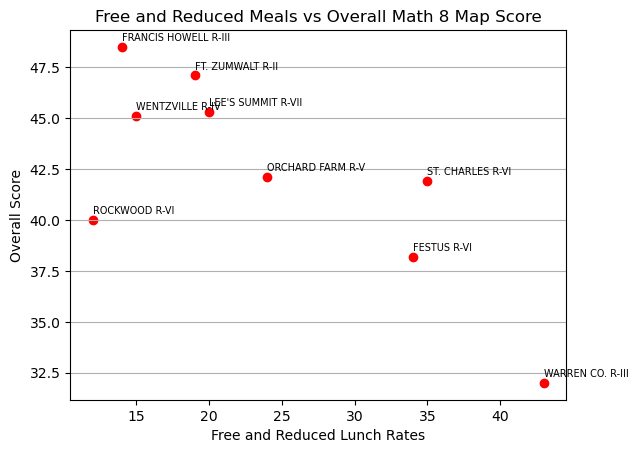

In [160]:
#FR Rates Math 8
x = merged_all_data_2_df["FR_PCT_FLOAT"]
y=merged_all_data_2_df["MAP MATH AVERAGE 8"]
n=merged_all_data_2_df["DISTRICT_NAME"]

fig, ax = plt.subplots()
plt.scatter(x,y, color = 'r')
plt.xlabel("Free and Reduced Lunch Rates")
plt.ylabel("Overall Score")
plt.title("Free and Reduced Meals vs Overall Math 8 Map Score")
plt.grid(axis="y")
#texts = []
#for i, txt in enumerate( n ):
    #texts.append(ax.text(x[i], y[i], txt))
#adjust_text(texts)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]+0.2), size = 7, horizontalalignment="left", verticalalignment="bottom")
plt.savefig("FrMathGr8")
plt.show()

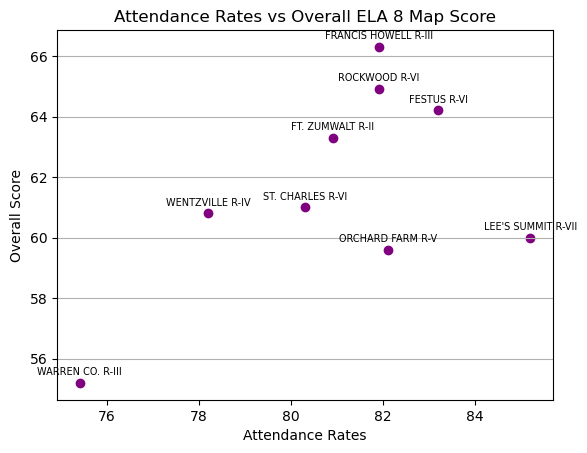

In [156]:
#Attendance Rates ELA 8

x = merged_all_data_2_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"]
y=merged_all_data_2_df["MAP ELA 8 AVERAGE"]
n=merged_all_data_df["DISTRICT_NAME"]

fig, ax = plt.subplots()
plt.scatter(x,y, color = 'purple')
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x_values,regress_values,"r-")
plt.xlabel("Attendance Rates")
plt.ylabel("Overall Score")
plt.title("Attendance Rates vs Overall ELA 8 Map Score")
plt.grid(axis="y")
#texts = []
#for i, txt in enumerate( n ):
    #texts.append(ax.text(x[i], y[i], txt))
#adjust_text(texts)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]+0.2), size = 7, horizontalalignment="center", verticalalignment="bottom")
plt.savefig("AttELAGr8")
plt.show()

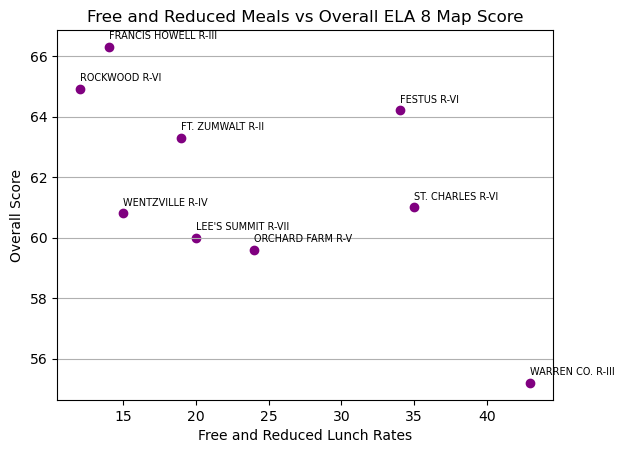

In [159]:
#FR Rates ELA 8
x = merged_all_data_2_df["FR_PCT_FLOAT"]
y=merged_all_data_2_df["MAP ELA 8 AVERAGE"]
n=merged_all_data_2_df["DISTRICT_NAME"]

fig, ax = plt.subplots()
plt.scatter(x,y, color = 'purple')
plt.xlabel("Free and Reduced Lunch Rates")
plt.ylabel("Overall Score")
plt.title("Free and Reduced Meals vs Overall ELA 8 Map Score")
plt.grid(axis="y")
#texts = []
#for i, txt in enumerate( n ):
    #texts.append(ax.text(x[i], y[i], txt))
#adjust_text(texts)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]+0.2), size = 7, horizontalalignment="left", verticalalignment="bottom")
plt.savefig("FrELAGr8")
plt.show()

# Scores 6th

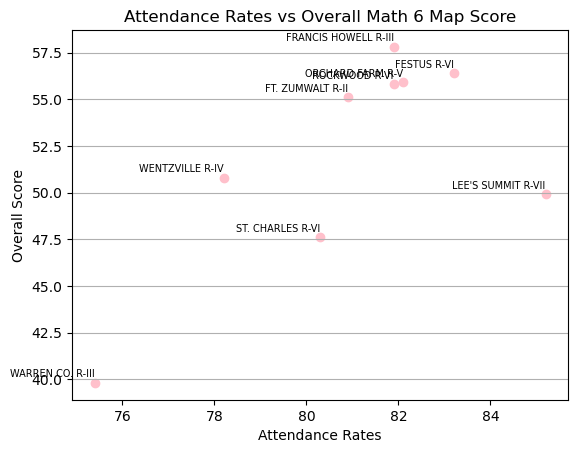

In [165]:
#Attendance Rates Math 6

x = merged_all_data_2_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"]
y=merged_all_data_2_df["MAP MATH 6 AVERAGE"]
n=merged_all_data_df["DISTRICT_NAME"]

fig, ax = plt.subplots()
plt.scatter(x,y, color = 'pink')
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x_values,regress_values,"r-")
plt.xlabel("Attendance Rates")
plt.ylabel("Overall Score")
plt.title("Attendance Rates vs Overall Math 6 Map Score")
plt.grid(axis="y")
#texts = []
#for i, txt in enumerate( n ):
    #texts.append(ax.text(x[i], y[i], txt))
#adjust_text(texts)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]+0.2), size = 7, horizontalalignment="right", verticalalignment="bottom")
plt.savefig("AttMathGr6")
plt.show()

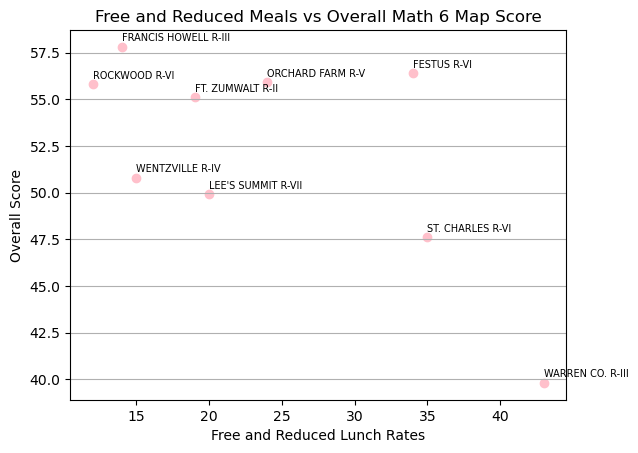

In [166]:
#FR Rates ELA 8
x = merged_all_data_2_df["FR_PCT_FLOAT"]
y=merged_all_data_2_df["MAP MATH 6 AVERAGE"]
n=merged_all_data_2_df["DISTRICT_NAME"]

fig, ax = plt.subplots()
plt.scatter(x,y, color = 'pink')
plt.xlabel("Free and Reduced Lunch Rates")
plt.ylabel("Overall Score")
plt.title("Free and Reduced Meals vs Overall Math 6 Map Score")
plt.grid(axis="y")
#texts = []
#for i, txt in enumerate( n ):
    #texts.append(ax.text(x[i], y[i], txt))
#adjust_text(texts)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]+0.2), size = 7, horizontalalignment="left", verticalalignment="bottom")
plt.savefig("FrMathGr6")
plt.show()

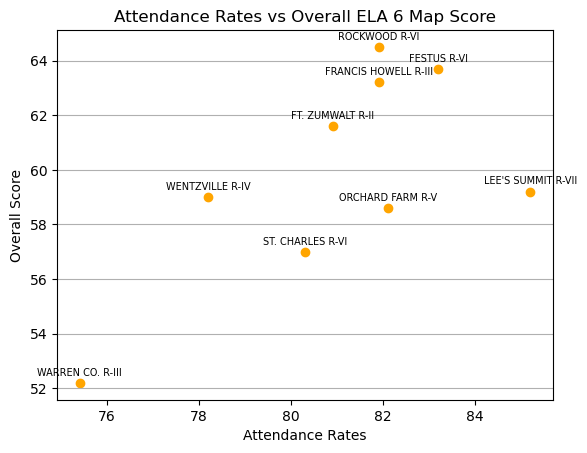

In [167]:
#Attendance Rates ELA 6

x = merged_all_data_2_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"]
y=merged_all_data_2_df["MAP ELA 6 AVERAGE"]
n=merged_all_data_df["DISTRICT_NAME"]

fig, ax = plt.subplots()
plt.scatter(x,y, color = 'orange')
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x_values,regress_values,"r-")
plt.xlabel("Attendance Rates")
plt.ylabel("Overall Score")
plt.title("Attendance Rates vs Overall ELA 6 Map Score")
plt.grid(axis="y")
#texts = []
#for i, txt in enumerate( n ):
    #texts.append(ax.text(x[i], y[i], txt))
#adjust_text(texts)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]+0.2), size = 7, horizontalalignment="center", verticalalignment="bottom")
plt.savefig("AttELAGr6")
plt.show()

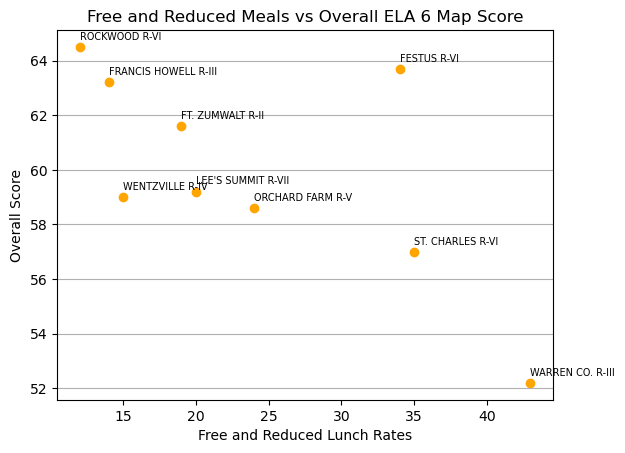

In [168]:
#FR Rates ELA 8
x = merged_all_data_2_df["FR_PCT_FLOAT"]
y=merged_all_data_2_df["MAP ELA 6 AVERAGE"]
n=merged_all_data_2_df["DISTRICT_NAME"]

fig, ax = plt.subplots()
plt.scatter(x,y, color = 'orange')
plt.xlabel("Free and Reduced Lunch Rates")
plt.ylabel("Overall Score")
plt.title("Free and Reduced Meals vs Overall ELA 6 Map Score")
plt.grid(axis="y")
#texts = []
#for i, txt in enumerate( n ):
    #texts.append(ax.text(x[i], y[i], txt))
#adjust_text(texts)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]+0.2), size = 7, horizontalalignment="left", verticalalignment="bottom")
plt.savefig("FrELAGr6")
plt.show()